# Import Libraries

In [1]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import export_text

# Data Setup

In [2]:
# Load the dataset
file_dir=r"C:\Users\faiza\Documents\Uni\Year 3\Data Mining\CW\AccidentLondonBoroughs2223.csv"

In [3]:
# Create dataset
data = pd.read_csv(file_dir)
data = data[data['Local_Authority_Highway'] == 'E09000002']
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
7119,200501JI40084,548420,189060,0.140697,51.580810,1,3,2,1,02/02/2005,...,0,5,1,1,1,0,0,1,1,E01000030
7171,200501JI40151,547280,186940,0.123368,51.562060,1,3,2,1,07/03/2005,...,0,0,1,1,1,0,0,1,2,E01000026
7269,200501JI40266,546960,187040,0.118796,51.563042,1,3,2,1,06/04/2005,...,0,1,1,1,1,0,0,1,2,E01003717
7312,200501JI40313,547700,187580,0.129691,51.567701,1,3,3,1,13/05/2005,...,0,0,1,1,1,0,0,1,1,E01003717
7406,200501JI40424,546670,185760,0.114082,51.551616,1,3,2,2,30/06/2005,...,0,5,1,1,1,0,0,1,1,E01000021


# Data Understanding

In [4]:
data.shape

(2837, 32)

In [5]:
# Display basic information about the dataset
print("Total Number of Instances:")
data.shape[0]

Total Number of Instances:


2837

In [6]:
print("Number of Attributes:")
data.shape[1]

Number of Attributes:


32

In [7]:
print("Data Types of Each Attribute:")
data.dtypes

Data Types of Each Attribute:


Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [8]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_District,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.0,2837.000000,2837.000000,2837.000000,2837.000000,2837.0,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,547307.250617,185170.972859,0.123024,51.546154,1.0,2.882975,1.883327,1.256257,4.080719,16.0,...,118.339443,0.005287,0.758548,1.765597,1.407825,1.170955,0.029609,0.031019,1.008812,1.203736
std,1867.888748,1686.646667,0.027209,0.014966,0.0,0.352878,0.668235,0.616733,1.943718,0.0,...,326.739973,0.089900,1.754865,1.363322,1.495073,0.453822,0.336702,0.407645,0.093475,0.408064
min,543440.000000,181720.000000,0.066949,51.515460,1.0,1.000000,1.000000,1.000000,1.000000,16.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,545830.000000,183800.000000,0.100902,51.534140,1.0,3.000000,2.000000,1.000000,2.000000,16.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,547650.000000,184640.000000,0.127615,51.541392,1.0,3.000000,2.000000,1.000000,4.000000,16.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,548810.000000,186250.000000,0.144906,51.555610,1.0,3.000000,2.000000,1.000000,6.000000,16.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,551290.000000,190750.000000,0.181084,51.595890,1.0,3.000000,7.000000,9.000000,7.000000,16.0,...,1306.000000,2.000000,8.000000,7.000000,9.000000,5.000000,6.000000,7.000000,2.000000,3.000000


In [9]:
# Basic statistics for each attribute
basic_statistics = data.describe(include='all')

In [10]:
# Display basic statistics
print("Basic Statistics of Each Attribute:")
print(basic_statistics)

Basic Statistics of Each Attribute:
       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
count            2837            2837.000000             2837.000000   
unique           2837                    NaN                     NaN   
top     200501JI40084                    NaN                     NaN   
freq                1                    NaN                     NaN   
mean              NaN          547307.250617           185170.972859   
std               NaN            1867.888748             1686.646667   
min               NaN          543440.000000           181720.000000   
25%               NaN          545830.000000           183800.000000   
50%               NaN          547650.000000           184640.000000   
75%               NaN          548810.000000           186250.000000   
max               NaN          551290.000000           190750.000000   

          Longitude     Latitude  Police_Force  Accident_Severity  \
count   2837.000000  2837.0000

In [11]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Attribute:")
print(missing_values)

Missing Values in Each Attribute:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
Local_Authority_Highway                        0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                   

In [12]:
# Checking for outliers and extreme values (using IQR method as an example)
numeric_data = data.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Potential Outliers in Each Attribute:")
print(outliers)

Potential Outliers in Each Attribute:
Location_Easting_OSGR                            0
Location_Northing_OSGR                          26
Longitude                                        0
Latitude                                        28
Police_Force                                     0
Accident_Severity                              302
Number_of_Vehicles                             989
Number_of_Casualties                           552
Day_of_Week                                      0
Local_Authority_District                         0
1st_Road_Class                                   0
1st_Road_Number                                614
Road_Type                                        0
Speed_limit                                    354
Junction_Detail                                  0
Junction_Control                                 0
2nd_Road_Class                                   0
2nd_Road_Number                                630
Pedestrian_Crossing-Human_Control           

# Data  Preperation

In [13]:
# Handling missing values - all null values have been dropped
data.dropna(inplace=True)

In [14]:
# Capping outliers - just as aforementioned, the following attributes have large ranges,
# there is a removal of outliers
cap_value = data['Number_of_Casualties'].quantile(0.95)
data['Number_of_Casualties'] = data['Number_of_Casualties'].clip(upper=cap_value)

In [15]:
# Converting Date and extracting Hour_of_Day
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Hour_of_Day'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

In [16]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Weather_Conditions'] = label_encoder.fit_transform(data['Weather_Conditions'])

In [17]:
# Dropping irrelevant features
data.drop(['Accident_Index', 'Time'], axis=1, inplace=True)

In [18]:
# Normalizing numeric attributes
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [19]:
# Splitting the dataset
train_set, test_set = train_test_split(data, test_size=0.30, random_state=42)
test_set, val_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [20]:
#correlation matrix
corr = data.corr
corr

<bound method DataFrame.corr of         Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
7119                 0.594739                2.304047   0.648577  2.313958   
7171                -0.016126                1.047386   0.011127  1.061377   
7269                -0.187598                1.106663  -0.157055  1.126979   
7312                 0.208929                1.426756   0.243719  1.438220   
7406                -0.342993                0.347925  -0.330460  0.363673   
...                       ...                     ...        ...       ...   
137976              -0.578766               -1.211046  -0.603921 -1.207431   
137980              -1.827289               -0.636064  -1.824048 -0.585149   
138001              -0.455521               -0.825749  -0.472083 -0.821236   
138007              -0.466238               -0.902808  -0.484664 -0.898929   
138021               1.205605               -1.080637   1.164084 -1.133546   

        Police_Force  Accident_

In [21]:
# Example: K-Means Clustering
# Selecting features for clustering
X = data[['Longitude', 'Latitude']]

In [22]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\faiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\faiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\faiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\faiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

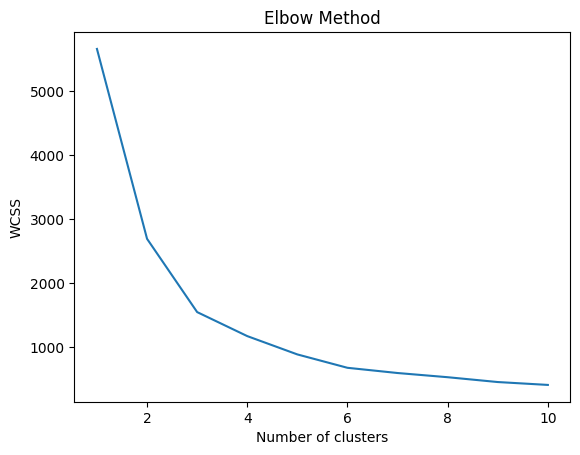

In [23]:
# Plotting the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Choose the number of clusters (k) and fit the model
k = 3 # optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\faiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


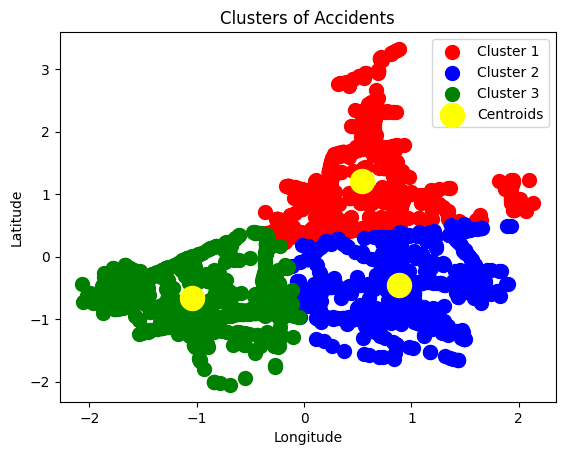

In [25]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0]['Longitude'], X[y_kmeans == 0]['Latitude'], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Longitude'], X[y_kmeans == 1]['Latitude'], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Longitude'], X[y_kmeans == 2]['Latitude'], s=100, c='green', label='Cluster 3')

# Visualizing the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Plotting details
plt.title('Clusters of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the plot
plt.show()

In [26]:
# data is the preprocessed DataFrame and here I am selecting a subset of categorical columns for analysis
categorical_columns = ['Weather_Conditions', 'Light_Conditions', 'Road_Surface_Conditions', 'Day_of_Week',
                       'Urban_or_Rural_Area', 'Road_Type', 'Speed_limit', 'Junction_Detail',
                       'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
                       'Accident_Severity']
categorical_data = data[categorical_columns].astype(str)

In [27]:
# One-hot encoding the categorical data
one_hot_data = pd.get_dummies(categorical_data)

In [28]:
# Generating frequent itemsets
frequent_itemsets = apriori(one_hot_data, min_support=0.01, use_colnames=True)  # Adjust the support value as appropriate

In [29]:
# Generating the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)  # Adjust the confidence threshold as appropriate

In [30]:
# Sorting the rules by descending confidence
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Display the top rules
print(rules_sorted.head())

                                              antecedents  \
496858  (Speed_limit_-0.32798574578991446, Accident_Se...   
435440  (Urban_or_Rural_Area_-0.09437322535767437, Lig...   
929636  (Pedestrian_Crossing-Human_Control_-0.05887516...   
721411  (Accident_Severity_-2.5038171271808394, Juncti...   
93047   (Urban_or_Rural_Area_-0.09437322535767437, Day...   

                                              consequents  antecedent support  \
496858         (Urban_or_Rural_Area_-0.09437322535767437)            0.035664   
435440  (Pedestrian_Crossing-Human_Control_-0.05887516...            0.016949   
929636                 (Speed_limit_-0.32798574578991446)            0.033898   
721411  (Urban_or_Rural_Area_-0.09437322535767437, Wea...            0.018008   
93047   (Pedestrian_Crossing-Human_Control_-0.05887516...            0.087571   

        consequent support   support  confidence      lift  leverage  \
496858            0.991172  0.035664         1.0  1.008906  0.000315   
43

In [31]:
# Select features and target variable
# Drop non-numeric columns for simplicity or convert them to numeric if necessary
X = data.select_dtypes(include=['int64', 'float64']).drop('Number_of_Casualties', axis=1)
y = data['Number_of_Casualties']

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
# Make predictions
y_pred = dt_regressor.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.9749824096037143


In [36]:
# Visualize the decision tree
plt.figure(figsize=(200,100))
tree.plot_tree(dt_regressor, filled=True, feature_names=X.columns, max_depth=4)  # Adjust max_depth as needed
plt.show()
plt.savefig("tree.jpg")

<Figure size 640x480 with 0 Axes>

In [37]:
# Assuming dt_regressor is your trained DecisionTreeRegressor and X_train contains your training features
tree_rules = export_text(dt_regressor, feature_names=X_train.columns.tolist())
print(tree_rules)

|--- Number_of_Vehicles <= 0.92
|   |--- Number_of_Vehicles <= -0.57
|   |   |--- Location_Easting_OSGR <= -1.89
|   |   |   |--- Light_Conditions <= 0.54
|   |   |   |   |--- value: [-0.49]
|   |   |   |--- Light_Conditions >  0.54
|   |   |   |   |--- Speed_limit <= 0.42
|   |   |   |   |   |--- value: [2.04]
|   |   |   |   |--- Speed_limit >  0.42
|   |   |   |   |   |--- value: [-0.49]
|   |   |--- Location_Easting_OSGR >  -1.89
|   |   |   |--- Latitude <= 0.43
|   |   |   |   |--- Longitude <= 0.91
|   |   |   |   |   |--- Carriageway_Hazards <= 10.96
|   |   |   |   |   |   |--- Longitude <= -0.85
|   |   |   |   |   |   |   |--- Longitude <= -0.85
|   |   |   |   |   |   |   |   |--- Pedestrian_Crossing-Physical_Facilities <= 3.85
|   |   |   |   |   |   |   |   |   |--- Light_Conditions <= 0.54
|   |   |   |   |   |   |   |   |   |   |--- Latitude <= -0.61
|   |   |   |   |   |   |   |   |   |   |   |--- value: [-0.49]
|   |   |   |   |   |   |   |   |   |   |--- Latitude >  